In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# 프로젝트 개요
- 강의명 : 2022년 K-디지털 직업훈련(Training) 사업 - AI데이터플랫폼을 활용한 빅데이터 분석전문가 과정
- 교과목명 : 빅데이터 분석 및 시각화, AI개발 기초, 인공지능 프로그래밍
- 프로젝트 주제 : Spaceship Titanic 데이터를 활용한 탑승유무 분류모형 개발
- 프로젝트 마감일 : 2022년 4월 12일 화요일
- 강사명 : 정지훈 강사
- 수강생명 : 양승학

# import libraries and data

In [2]:
# 데이터 가공 
import numpy as np 
import pandas as pd 

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go




numpy version: 1.20.3
pandas version: 1.3.5
matplotlib version: 3.5.1
seaborn version: 0.11.2


In [3]:
train_data = pd.read_csv("../input/spaceship-titanic/train.csv")
test_data = pd.read_csv("../input/spaceship-titanic/test.csv")
sample_submission = pd.read_csv("../input/spaceship-titanic/sample_submission.csv")

train_data.shape, test_data.shape, sample_submission.shape

((8693, 14), (4277, 13), (4277, 2))

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [6]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


# Exploratory Data Analysis

- Pre-processing some data before visualization

In [7]:
train_data['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [8]:
train_data['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [9]:
train_data['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

- It visualized the data with a pie graph that can recognize the data at a glance.

In [10]:
fig = go.Figure(data=[go.Pie(labels=train_data.CryoSleep, hole=.4)])
fig.add_annotation(text='CryoSleep',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='Bebas Neue')
fig.update_traces(hoverinfo='label+percent+value',
                  marker=dict(colors=['red','blue'], line=dict(color='#000000', width=2)))
fig.update_layout(
    font_family='Bebas Neue',
    title=dict(text='CryoSleep',x=0.50,y=0.98,
               font=dict(color='black',size=20)),
    legend=dict(orientation='v',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

- Percentage of people cryo sleep among all people aboard the spaceship

In [11]:
fig = go.Figure(data=[go.Pie(labels=train_data.HomePlanet, hole=.4)])
fig.add_annotation(text='HomePlanet',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='Bebas Neue')
fig.update_traces(hoverinfo='label+percent+value',
                  marker=dict(colors=['red','blue'], line=dict(color='#000000', width=2)))
fig.update_layout(
    font_family='Bebas Neue',
    title=dict(text='HomePlanet',x=0.50,y=0.98,
               font=dict(color='black',size=20)),
    legend=dict(orientation='v',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

- the home planet of people living in spaceship

In [12]:
fig = go.Figure(data=[go.Pie(labels=train_data.Destination, hole=.4)])
fig.add_annotation(text='Destination',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='Bebas Neue')
fig.update_traces(hoverinfo='label+percent+value',
                  marker=dict(colors=['red','blue'], line=dict(color='#000000', width=2)))
fig.update_layout(
    font_family='Bebas Neue',
    title=dict(text='Destination',x=0.50,y=0.98,
               font=dict(color='black',size=20)),
    legend=dict(orientation='v',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

- each person's destination

In [13]:
fig = go.Figure(data=[go.Pie(labels=train_data.VIP, hole=.4)])
fig.add_annotation(text='VIP',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='Bebas Neue')
fig.update_traces(hoverinfo='label+percent+value',
                  marker=dict(colors=['red','blue'], line=dict(color='#000000', width=2)))
fig.update_layout(
    font_family='Bebas Neue',
    title=dict(text='VIP',x=0.50,y=0.98,
               font=dict(color='black',size=20)),
    legend=dict(orientation='v',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

- Ratio of vip to non-vip people

In [14]:
fig = go.Figure(data=[go.Pie(labels=train_data.Transported, hole=.4)])
fig.add_annotation(text='Transported',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='Bebas Neue')
fig.update_traces(hoverinfo='label+percent+value',
                  marker=dict(colors=['red','blue'], line=dict(color='#000000', width=2)))
fig.update_layout(
    font_family='Bebas Neue',
    title=dict(text='Transported',x=0.50,y=0.98,
               font=dict(color='black',size=20)),
    legend=dict(orientation='v',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

- The percentage of people transported to the destination and those who did not

In [15]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [16]:
numeric_features = train_data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

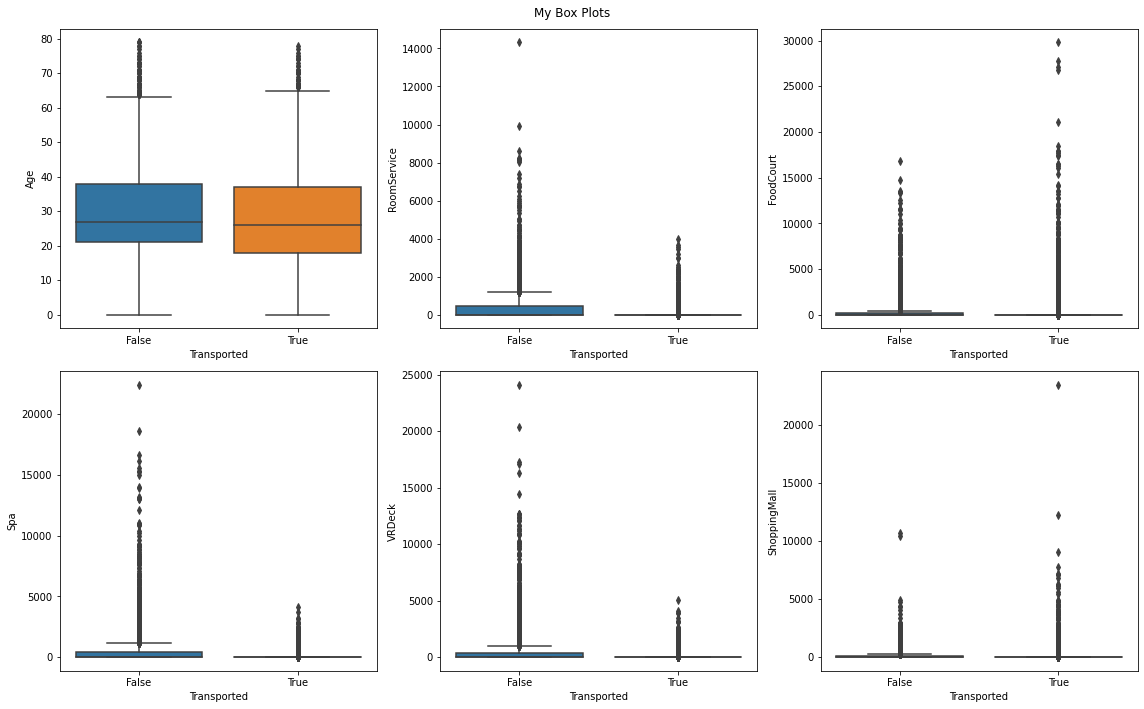

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10)) 
data = train_data.copy()

for i, col in enumerate(data[numeric_features.columns].columns[0:]): 
    # print(i, col)
    if i <= 2:
        sns.boxplot(x=data["Transported"], y=data[col], ax=ax[0,i]) 
    else: 
        sns.boxplot(x=data["Transported"], y=data[col], ax=ax[1,i-4]) 
fig.suptitle('My Box Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

In [18]:
train_data['RoomService'].value_counts()

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

In [19]:
train_data['FoodCourt'].value_counts()

0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1507, dtype: int64

In [20]:
train_data['Spa'].value_counts()

0.0       5324
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: Spa, Length: 1327, dtype: int64

# Pre-processing data processing

- Remove unnecessary variables
 

In [21]:
train_data['Name'].value_counts()

Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64

In [22]:
train_data['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [23]:
remove_cols = ['PassengerId', 'Name', 'Cabin']
PassengerId = test_data['PassengerId']

print("Before:", train_data.shape, test_data.shape)
train_data = train_data.drop(remove_cols, axis=1)
test_data = test_data.drop(remove_cols, axis=1)

print("After:", train_data.shape, test_data.shape)

Before: (8693, 14) (4277, 13)
After: (8693, 11) (4277, 10)


In [24]:
train_data.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [25]:
test_data.isnull().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [26]:
from sklearn.impute import SimpleImputer

imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
STRATEGY = 'median'

imputer = SimpleImputer(strategy=STRATEGY)
imputer.fit(train_data[imputer_cols])
train_data[imputer_cols] = imputer.transform(train_data[imputer_cols])
test_data[imputer_cols] = imputer.transform(test_data[imputer_cols])

print("train_data:\n", train_data.isnull().sum())
print("---")
print("test_data:\n", test_data.isnull().sum())

train_data:
 HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64
---
test_data:
 HomePlanet      87
CryoSleep       93
Destination     92
Age              0
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
dtype: int64


In [27]:
imputer_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
STRATEGY = 'most_frequent'

imputer = SimpleImputer(strategy=STRATEGY)
imputer.fit(train_data[imputer_cols])
train_data[imputer_cols] = imputer.transform(train_data[imputer_cols])
test_data[imputer_cols] = imputer.transform(test_data[imputer_cols])

print("train_data:\n", train_data.isnull().sum())
print("---")
print("test_data:\n", test_data.isnull().sum())

train_data:
 HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64
---
test_data:
 HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


## Categorical Feature Encoding


In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Target 데이터는 1과 0으로 바꿈
train_data['Transported'] = train_data['Transported'].map({True: 1, False: 0})
categorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

transformer = make_column_transformer(
    (OneHotEncoder(), categorical_cols),
    remainder='passthrough')

train_transformed = transformer.fit_transform(train_data[categorical_cols])
train_transformed_df = pd.DataFrame(train_transformed, columns=transformer.get_feature_names_out())
train_data = pd.concat([train_data, train_transformed_df], axis = 1)
train_data = train_data.drop(categorical_cols, axis = 1)

test_transformed = transformer.fit_transform(test_data[categorical_cols])
test_transformed_df = pd.DataFrame(test_transformed, columns=transformer.get_feature_names_out())
test_data = pd.concat([test_data, test_transformed_df], axis = 1)
test_data = test_data.drop(categorical_cols, axis = 1)

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       8693 non-null   float64
 1   RoomService                               8693 non-null   float64
 2   FoodCourt                                 8693 non-null   float64
 3   ShoppingMall                              8693 non-null   float64
 4   Spa                                       8693 non-null   float64
 5   VRDeck                                    8693 non-null   float64
 6   Transported                               8693 non-null   int64  
 7   onehotencoder__HomePlanet_Earth           8693 non-null   float64
 8   onehotencoder__HomePlanet_Europa          8693 non-null   float64
 9   onehotencoder__HomePlanet_Mars            8693 non-null   float64
 10  onehotencoder__CryoSleep_False      

In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       4277 non-null   float64
 1   RoomService                               4277 non-null   float64
 2   FoodCourt                                 4277 non-null   float64
 3   ShoppingMall                              4277 non-null   float64
 4   Spa                                       4277 non-null   float64
 5   VRDeck                                    4277 non-null   float64
 6   onehotencoder__HomePlanet_Earth           4277 non-null   float64
 7   onehotencoder__HomePlanet_Europa          4277 non-null   float64
 8   onehotencoder__HomePlanet_Mars            4277 non-null   float64
 9   onehotencoder__CryoSleep_False            4277 non-null   float64
 10  onehotencoder__CryoSleep_True       

# Development of Machine Learning Model

In [31]:
X_cols = test_data.columns
X = train_data[X_cols].to_numpy()
y = train_data['Transported'].to_numpy()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6085, 16), (2608, 16), (6085,), (2608,))

In [33]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42, max_depth=10, n_estimators=75)
lgb


LGBMClassifier(max_depth=10, n_estimators=75, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split , GridSearchCV
random_forest = RandomForestClassifier(random_state=42 , max_depth=9, n_estimators=110)
model=GridSearchCV(estimator=RandomForestClassifier(random_state=0), 
                   param_grid=[{'max_depth': [7]}], scoring='accuracy', cv=2)
model.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': [7]}], scoring='accuracy')

In [35]:
model.best_params_

{'max_depth': 7}

# Model Assessment

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

splitter = StratifiedKFold(n_splits = 110, shuffle = True, random_state=0)
scores = cross_validate(random_forest, X_train, y_train, return_train_score = True, cv=splitter)

print("train Acc.", np.mean(scores['train_score']))
print("test Acc.", np.mean(scores['test_score']))

train Acc. 0.8403594439029388
test Acc. 0.7925914994096813


In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

splitter = StratifiedKFold(n_splits = 80, shuffle = True, random_state=5)
scores = cross_validate(lgb, X_train, y_train, return_train_score = True, cv=splitter)

print("train Acc.", np.mean(scores['train_score']))
print("test Acc.", np.mean(scores['test_score']))

train Acc. 0.8458067707997479
test Acc. 0.795883885850991


In [38]:
from sklearn.metrics import accuracy_score

lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_val)
lgb_score = accuracy_score(y_pred, y_val)
lgb_score

0.7933282208588958

In [39]:

random_forest.fit(X_train, y_train)
RF_pred = random_forest.predict(X_val)
RF_score = accuracy_score(RF_pred, y_val)
RF_score

0.7921779141104295

In [40]:
index = ['RandomForest', 'LGBMClassifier']
scores = pd.DataFrame({'Scores' : [RF_score, lgb_score]}, index=index)
scores

,Scores
RandomForest,0.792178
LGBMClassifier,0.793328


In [41]:
test_preds = random_forest.predict(test_data.to_numpy())
sample_submission['Transported'] = test_preds.astype("bool")
sample_submission.to_csv("submission.csv",index=False)
sample_submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [42]:
sample_submission.to_csv(f'20220412_AI_Project_yangseunghak.csv',index = False)